## Begin imports

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Define our functions

In [182]:
def remove_label(row):
    return row[:-1]

def euclidean_distance(x, y):
    return np.sqrt(np.sum(np.square(x-y)))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

def cosine_distance(x, y):
    return 1 - cosine_similarity(x, y)

# When euclidean is king

In this example we have a list labrador dogs, represented as a matrix. Each row represents a single dog, with each column representing one of the dogs attributes - namely Weight, Length and Age, where age can be one of three possible values - 0 (young), 1 (mid) or 2 (adult)

In [183]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.8, 0]])

labels = ["young", "mid", "adult"]

In [184]:

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


## Lets plot all of our points

After plotting all of our points we can clearly see how dogs with a similar weight and length have formed natural clusters which correspond with their respective labels

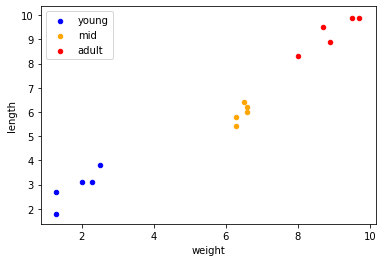

In [185]:
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)

## Setting up a test

Lets take a point from each cluster and plot it on our graph. We'll also plot a point with no known label.

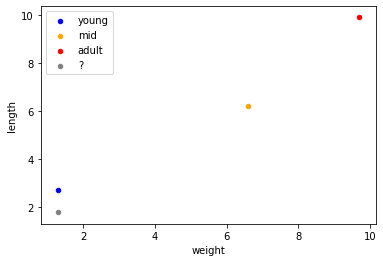

In [186]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)

## calculate the eculidean distance
And then make a prediction

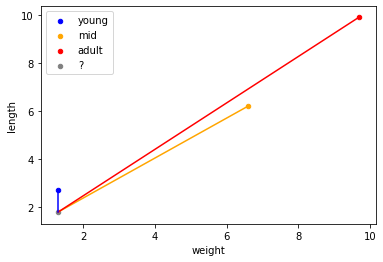

In [187]:
known = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
unknown = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = known[known['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = known[known['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = known[known['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = unknown.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
plt.plot([df.iloc[0].weight,df.iloc[14].weight], [df.iloc[0].length,df.iloc[14].length], color="orange")
plt.plot([df.iloc[1].weight,df.iloc[14].weight], [df.iloc[1].length,df.iloc[14].length], color="red")
plt.plot([df.iloc[4].weight,df.iloc[14].weight], [df.iloc[4].length,df.iloc[14].length], color="blue")

In [188]:
x0 = remove_label(X[0])
x1 = remove_label(X[1])
x4 = remove_label(X[4])
x14 = remove_label(X[14])

xd0 = { "idx": 0, "distance": euclidean_distance(x14, x0) }
xd1 = { "idx": 1, "distance": euclidean_distance(x14, x1) }
xd4 = { "idx": 4, "distance": euclidean_distance(x14, x4) }

distances = [ xd0, xd1, xd4 ]

distances.sort(key=lambda x: x['distance']) 
distances_df = pd.DataFrame(distances)
print(distances_df)

i = distances[0]['idx']
d = distances[0]['distance']
l = labels[int(df.iloc[i]['label'])]
print(f"euclidean distance of {d} resulted in unknown dog being classified as {l}")

   idx   distance
0    4   0.900000
1    0   6.888396
2    1  11.669190
euclidean distance of 0.9000000000000001 resulted in unknown dog being classified as young


## calculate the cosine difference
And then make a prediction

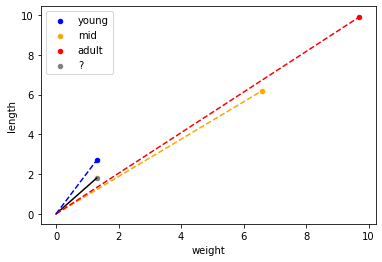

In [189]:
known = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
unknown = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = known[known['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = known[known['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = known[known['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = unknown.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
plt.plot([0,df.iloc[14].weight], [0,df.iloc[14].length], color="black")
plt.plot([0,df.iloc[0].weight], [0,df.iloc[0].length], color="orange", linestyle='--')
plt.plot([0,df.iloc[1].weight], [0,df.iloc[1].length], color="red", linestyle='--')
plt.plot([0,df.iloc[4].weight], [0,df.iloc[4].length], color="blue", linestyle='--')

In [190]:
xd0 = { "idx": 0, "distance": cosine_distance(x14, x0) }
xd1 = { "idx": 1, "distance": cosine_distance(x14, x1) }
xd4 = { "idx": 4, "distance": cosine_distance(x14, x4) }

distances = [ xd0, xd1, xd4 ]

distances.sort(key=lambda x: x['distance']) 
distances_df = pd.DataFrame(distances)
print(distances_df)

i = distances[0]['idx']
d = distances[0]['distance']
l = labels[int(df.iloc[i]['label'])]
print(f"cosine distance of {d} resulted in unknown dog being classified as {l}")

   idx  distance
0    1  0.011186
1    4  0.015582
2    0  0.018214
cosine distance of 0.011185536446641664 resulted in unknown dog being classified as adult


## results
In this case euclidean distance proved to be the much better measure as the magnitude of both length and weight are more important that the ratio of length to weight when determining how old a dog is

# When cosine is king

Given the following document set and word frequencies


|document    | dog count | cat count  | label |
| -----------|-----------|------------|--------|
| hello kitty goes to space | 5 | 10 | cat |
| top ten cat facts | 1 | 4 | cat |
| how to pet a dog | 25 | 5 | ? |
| alien vs lassie | 60 | 8 | dog |

We need to determine a label for the document `how to pet a dog`, we'll add our documents to a matrix representation of this data.


In [191]:
X = np.array([[5, 10, 1],
              [1, 4, 1],
              [25, 5, 2],
              [60, 8, 0]])

labels = ["dog","cat","unknown"]

In [192]:
df = pd.DataFrame(X, columns=['dog count', 'cat count', 'label'])
df

,dog count,cat count,label
0,5,10,1
1,1,4,1
2,25,5,2
3,60,8,0


## Lets plot the points on a graph

Text(5, 25, ' X')

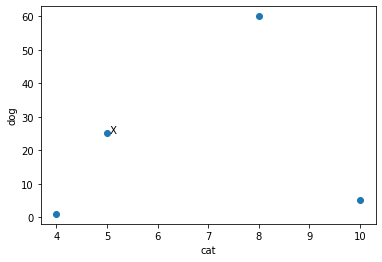

In [193]:

x = df['cat count']
y = df['dog count']

plt.xlabel('cat')
plt.ylabel('dog')

plt.scatter(x, y)
plt.text(5, 25, " X")

## calculate the euclidean distance

We'll draw a line between our unknown document and all our known documents, and then measure the length of these lines

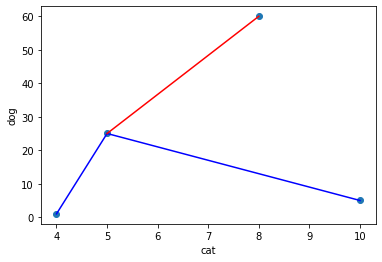

In [194]:
x = df['cat count']
y = df['dog count']

plt.xlabel('cat')
plt.ylabel('dog')

plt.scatter(x, y)

plt.plot([4,5], [1,25], color="blue")
plt.plot([10,5], [5,25], color="blue")
plt.plot([5,8], [25,60], color="red")

## calculate the euclidean distance 
And make a prediction

In [195]:
x0 = remove_label(X[0])
x1 = remove_label(X[1])
x3 = remove_label(X[3])
x2 = remove_label(X[2])

In [196]:
xd0 = { "idx": 0, "distance": euclidean_distance(x2, x0) }
xd1 = { "idx": 1, "distance": euclidean_distance(x2, x1) }
xd3 = { "idx": 3, "distance": euclidean_distance(x2, x3) }

distances = [ xd0, xd1, xd3 ]

distances.sort(key=lambda x: x['distance']) 
distances_df = pd.DataFrame(distances)
print(distances_df)

i = distances[0]['idx']
d = distances[0]['distance']
l = labels[int(df.iloc[i]['label'])]
print(f"euclidean distance of {d} resulted in unknown document being classified as {l}")

   idx   distance
0    0  20.615528
1    1  24.020824
2    3  35.128336
euclidean distance of 20.615528128088304 resulted in unknown document being classified as cat


## calculate the cosine distance 
And make a prediction

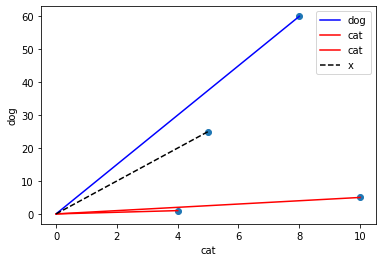

In [197]:
x = df['cat count']
y = df['dog count']

plt.xlabel('cat')
plt.ylabel('dog')

plt.scatter(x, y)

plt.plot([0,8], [0,60], color="blue", label="dog")
plt.plot([0,4], [0,1], color="red",  label="cat")
plt.plot([0,10], [0,5], color="red", label="cat")
plt.plot([0,5], [0,25], color="black", linestyle='--', label="x")

plt.legend()
plt.show()

In [198]:
xd0 = { "idx": 0, "distance": cosine_distance(x2, x0) }
xd1 = { "idx": 1, "distance": cosine_distance(x2, x1) }
xd3 = { "idx": 3, "distance": cosine_distance(x2, x3) }

distances = [ xd0, xd1, xd3 ]

distances.sort(key=lambda x: x['distance']) 
distances_df = pd.DataFrame(distances)
print(distances_df)

i = distances[0]['idx']
d = distances[0]['distance']
l = labels[int(df.iloc[i]['label'])]
print(f"cosine distance of {d} resulted in unknown document being classified as {l}")

   idx  distance
0    3  0.002102
1    0  0.386059
2    1  0.571914
cosine distance of 0.0021016373951946443 resulted in unknown document being classified as dog


## results
In this case cosine distance proved to be the much better measure as the ratio of the word frequencies is more important than the magnitude of word frequency
